In [2]:
import pandas as pd
import numpy as np

How many members' books are in the dataset?

In [3]:
sco_books = pd.read_csv('../data/SCoData_books_v1.2_2022_01.csv', encoding='utf-8', dtype={'year': 'Int32'})
sco_books.sample(5)

,uri,title,author,editor,translator,introduction,illustrator,photographer,year,format,uncertain,ebook_url,volumes_issues,notes,event_count,borrow_count,purchase_count,circulation_years,updated
1103,https://shakespeareandco.princeton.edu/books/h...,Rolling Stones,"Henry, O.",NaN,NaN,NaN,NaN,NaN,1912,Book,False,https://archive.org/details/rollingstones00hen...,NaN,NaN,3,3,0,1936;1924;1941,2021-11-07T19:20:11.311592+00:00
5940,https://shakespeareandco.princeton.edu/books/n...,"The Unfortunate Traveller; Or, The Life of Jac...","Nashe, Thomas",NaN,NaN,NaN,NaN,NaN,<NA>,Book,False,https://archive.org/details/unfortunatetrave00...,NaN,NaN,2,2,0,1924;1941,2021-10-31T18:11:23.274567+00:00
2961,https://shakespeareandco.princeton.edu/books/h...,Trader Horn: Being the Life and Works of Aloys...,"Horn, Alfred Aloysius",NaN,NaN,NaN,NaN,NaN,1927,Book,False,NaN,NaN,NaN,1,1,0,1927,2020-06-29T13:28:19+00:00
2832,https://shakespeareandco.princeton.edu/books/w...,Mr. Fortune's Maggot,"Warner, Sylvia Townsend",NaN,NaN,NaN,NaN,NaN,1927,Book,False,NaN,NaN,NaN,1,1,0,1947;1948,2020-04-30T19:40:21+00:00
2112,https://shakespeareandco.princeton.edu/books/f...,The Kang-He Vase,"Fletcher, Joseph Smith",NaN,NaN,NaN,NaN,NaN,1923,Book,False,NaN,NaN,NaN,3,3,0,1931;1932;1925,2020-04-30T19:40:18+00:00


In [4]:
sco_members = pd.read_csv('../data/SCoData_members_v1.2_2022_01.csv', encoding='utf-8', dtype={'year': 'Int32'})
sco_members.sample(6)

,uri,name,sort_name,title,gender,is_organization,has_card,birth_year,death_year,membership_years,viaf_url,wikipedia_url,nationalities,addresses,postal_codes,arrondissements,coordinates,notes,updated
4495,https://shakespeareandco.princeton.edu/members...,Mlle Sorel,"Sorel, Mlle",Mlle,Female,False,True,NaN,NaN,1937,NaN,NaN,NaN,"134 boulevard Saint-Germain, Paris",75006,6,"48.85279, 2.33846",NaN,2020-09-12T17:01:18+00:00
1828,https://shakespeareandco.princeton.edu/members...,G. Gardon,"Gardon, G.",Mlle,Female,False,False,NaN,NaN,1930,NaN,NaN,NaN,"11 rue Christiani, Paris",75018,18,"48.88589, 2.34841","The Shakespeare and Company <a href=""https://s...",2021-08-31T03:55:28+00:00
4265,https://shakespeareandco.princeton.edu/members...,Sazerac de Forge,Sazerac de Forge,NaN,NaN,False,False,NaN,NaN,1933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-11-21T21:13:58.620244+00:00
1565,https://shakespeareandco.princeton.edu/members...,Mr. Elliman,"Elliman, Mr.",Mr.,Male,False,False,NaN,NaN,1922,NaN,NaN,NaN,"4 avenue Sainte-Foy, Paris",92200,NaN,"48.88486, 2.26837","The Shakespeare and Company <a href=""https://s...",2021-08-26T01:26:21+00:00
4181,https://shakespeareandco.princeton.edu/members...,Mrs. Rowe,"Rowe, Mrs.",Mrs.,Female,False,False,NaN,NaN,1921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-31T03:41:25+00:00
3594,https://shakespeareandco.princeton.edu/members...,Mr. Ninas,"Ninas, Mr.",Mr.,Male,False,False,NaN,NaN,1925;1926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01T22:39:22+00:00


In [5]:
sco_books_aut = sco_books[sco_books['format'] == 'Book'][['author', 'title', 'format', 'year']].dropna()
sco_books_aut.rename(columns={'author':'sco_author'}, inplace=True)
sco_books_aut = sco_books_aut[~sco_books_aut['sco_author'].str.contains(';')] # ~ negates condition
sco_books_aut = sco_books_aut[(sco_books_aut['year'] >= 1919) & (sco_books_aut['year'] <= 1941)] # book published between 1919 and 1941
sco_books_aut.shape

(3512, 4)

In [6]:
sco_books_aut

,sco_author,title,format,year
1479,"Wilde, Oscar",A Critic in Pall Mall,Book,1919
1480,"Galsworthy, John","Addresses in America, 1919",Book,1919
1481,"Dostoyevsky, Fyodor",An Honest Thief,Book,1919
1482,"Joyce, P. W.",An Illustrated History of Ireland,Book,1919
1483,"Moore, George",Avowals,Book,1919
...,...,...,...,...
5259,"Seymour, Beatrice Kean",The Unquiet Field,Book,1940
5260,"Calder-Marshall, Arthur",The Way to Santiago,Book,1940
5261,"Mackenzie, Compton",The West Wind of Love,Book,1940
5262,"Caldwell, Erskine Preston",Trouble in July,Book,1940


In [7]:
sco_members_aut = sco_members[['sort_name']].dropna()

sco_members_aut.shape

(5235, 1)

In [8]:
sco_members_aut

,sort_name
0,"Abbott, Berenice"
1,"Abbott, Mrs. Paul"
2,Abdul
3,"Abel, Ernst Otto"
4,Abelin
...,...
5230,Ziegler
5231,"Zimmer, Isabelle"
5232,"Zongenth, H."
5233,"Zueblin, Miss"


In [9]:
sco_books_aut_unique = sco_books_aut.drop_duplicates(subset=['sco_author'])
sco_books_aut_unique.sample(7)
sco_books_aut_unique.shape

(1453, 4)

In [10]:
sco_books_aut_unique.sample(10)

,sco_author,title,format,year
2491,"Scott, Geoffrey",The Portrait of Zélide,Book,1925
4272,"Mendes, Alfred Hubert",Pitch Lake: A Story from Trinidad,Book,1934
2508,"Sieveking, Lance",The Ultimate Island: A Strange Adventure,Book,1925
3391,"Kessler, Harry Graf",Walter Rathenau: His Life and Work,Book,1929
2631,"Phillpotts, Eden","Peacock House, and Other Mysteries",Book,1926
2881,"Aubert, Charles",The Art of Pantomime,Book,1927
3465,"Schonfield, Hugh J.",Letters to Frederick Tennyson,Book,1930
5130,"Sheng, Xiaoxiao",Chin P'ing Mei,Book,1939
4284,Diplomat,Slow Death at Geneva,Book,1934
3701,"Menninger, Karl",The Human Mind,Book,1931


In [11]:
sco_members_aut.rename(columns={'author': 'sco_member'}, inplace=True)

sco_books_aut_unique.rename(columns={'author': 'sco_author'}, inplace=True)

merged_df = pd.merge(sco_members_aut, sco_books_aut_unique, how='outer', left_on='sort_name', right_on='sco_author')

intersection_df = merged_df.dropna(subset=['sort_name', 'sco_author'])

intersection_df.reset_index(drop=True, inplace=True) # to avoid confusion later on
intersection_df = intersection_df[['sco_author','sort_name']]

intersection_df

C:\Users\dittm\AppData\Local\Temp\ipykernel_20876\2495752277.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sco_books_aut_unique.rename(columns={'author': 'sco_author'}, inplace=True)


,sco_author,sort_name
0,"Aldington, Richard","Aldington, Richard"
1,"Anderson, Margaret C.","Anderson, Margaret C."
2,"Antheil, George","Antheil, George"
3,"Aragon, Louis","Aragon, Louis"
4,"Asch, Nathan","Asch, Nathan"
...,...,...
74,"Wescott, Glenway","Wescott, Glenway"
75,"Wilder, Thornton","Wilder, Thornton"
76,"Wilson, Margaret","Wilson, Margaret"
77,"Wilson, Romer","Wilson, Romer"


In [12]:
intersection_df_shape = intersection_df.shape[0]
print("Number of writers whose books were available:", intersection_df_shape)

Number of writers whose books were available: 79


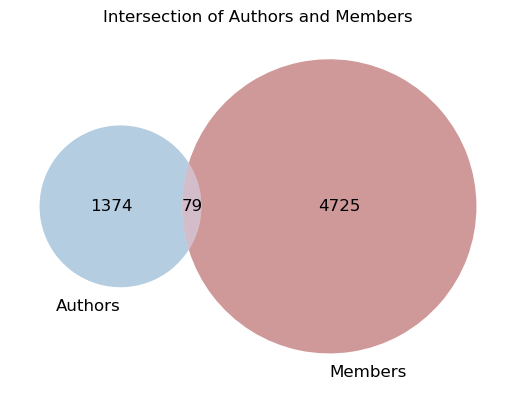

In [13]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Extract unique authors and members
unique_authors = set(sco_books_aut_unique['sco_author'])
unique_members = set(sco_members_aut['sort_name'])

# Calculate the intersection
intersection = len(unique_authors.intersection(unique_members))

# Create the Venn diagram for authors with customized colors
venn = venn2(subsets=(len(unique_authors) - intersection, len(unique_members) - intersection, intersection),
             set_labels=('Authors', 'Members'),
             set_colors=('steelblue', 'darkred'))

# Optionally, you can customize more properties, such as the transparency (alpha)
for subset in venn.subset_labels:
    if subset:  # If the subset is not None
        subset.set_fontsize(12)

plt.title('Intersection of Authors and Members')
plt.show()

In [14]:
intersection_df.sample(10)

,sco_author,sort_name
51,"MacLeish, Archibald","MacLeish, Archibald"
78,"Wright, Richard","Wright, Richard"
60,"Paul, Elliot","Paul, Elliot"
23,"Cowley, Malcolm","Cowley, Malcolm"
63,"Rodker, John","Rodker, John"
8,"Beckett, Samuel","Beckett, Samuel"
3,"Aragon, Louis","Aragon, Louis"
29,"Fitzgerald, F. Scott","Fitzgerald, F. Scott"
52,"Mansfield, Katherine","Mansfield, Katherine"
41,"Hemingway, Ernest","Hemingway, Ernest"


In [15]:
intersection_df.shape

(79, 2)

In [16]:
# Display the first few rows of each dataframe to ensure they are loaded correctly
print("First few rows of sco_books_aut_unique:")
print(sco_books_aut_unique.head())

print("First few rows of sco_members_aut:")
print(sco_members_aut.head())

# Check the length of the unique sets
print("Number of unique authors:", len(sco_books_aut_unique['sco_author'].unique()))
print("Number of unique members:", len(sco_members_aut['sort_name'].unique()))


First few rows of sco_books_aut_unique:
               sco_author                              title format  year
1479         Wilde, Oscar              A Critic in Pall Mall   Book  1919
1480     Galsworthy, John         Addresses in America, 1919   Book  1919
1481  Dostoyevsky, Fyodor                    An Honest Thief   Book  1919
1482         Joyce, P. W.  An Illustrated History of Ireland   Book  1919
1483        Moore, George                            Avowals   Book  1919
First few rows of sco_members_aut:
           sort_name
0   Abbott, Berenice
1  Abbott, Mrs. Paul
2              Abdul
3   Abel, Ernst Otto
4             Abelin
Number of unique authors: 1453
Number of unique members: 4804


Percent of the intersection relative to authors: 5.44%
Percent of the intersection relative to members: 1.64%


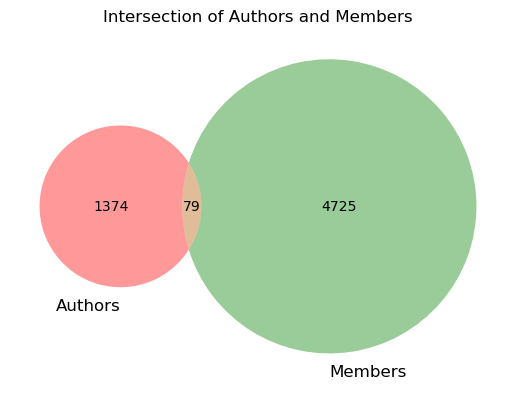

In [17]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Ensure sco_books_aut_unique and sco_members_aut are loaded
# For example purposes, I'm showing how you might load them if they're CSV files
# sco_books_aut_unique = pd.read_csv('path_to_sco_books_aut_unique.csv')
# sco_members_aut = pd.read_csv('path_to_sco_members_aut.csv')

# Check if the necessary columns exist
if 'sco_author' not in sco_books_aut_unique.columns:
    raise KeyError("Column 'sco_author' not found in sco_books_aut_unique")
if 'sort_name' not in sco_members_aut.columns:
    raise KeyError("Column 'sort_name' not found in sco_members_aut")

# Extract unique authors and members
unique_authors = set(sco_books_aut_unique['sco_author'])
unique_members = set(sco_members_aut['sort_name'])

# Calculate the intersection
intersection = len(unique_authors.intersection(unique_members))

# Calculate the percentages
percent_intersection_authors = (intersection / len(unique_authors)) * 100
percent_intersection_members = (intersection / len(unique_members)) * 100

print(f'Percent of the intersection relative to authors: {percent_intersection_authors:.2f}%')
print(f'Percent of the intersection relative to members: {percent_intersection_members:.2f}%')

# Create the Venn diagram for authors
venn2(subsets=(len(unique_authors) - intersection, len(unique_members) - intersection, intersection),
      set_labels=('Authors', 'Members'))
plt.title('Intersection of Authors and Members')
plt.show()


In [18]:
sco_books_aut_unique.shape

(1453, 4)

In [19]:
import pandas as pd

# Assuming the dataframes sco_books_aut_unique and sco_members_aut are already defined

# Extract unique authors and members
unique_authors = set(sco_books_aut_unique['sco_author'])
unique_members = set(sco_members_aut['sort_name'])

# Calculate the intersection
common_authors = unique_authors.intersection(unique_members)

# Filter the books dataframe to include only books written by these common authors
books_by_common_authors = sco_books_aut_unique[sco_books_aut_unique['sco_author'].isin(common_authors)]

# Display the filtered dataframe
books_by_common_authors.head(10)


,sco_author,title,format,year
1506,"Wilson, Romer",Martin Schüler,Book,1919
1528,"Pound, Ezra",Quia Pauper Amavi,Book,1919
1580,"Firbank, Ronald",Valmouth,Book,1919
1582,"Merrick, Leonard",When Love Flies Out o' the Window,Book,1919
1596,"Mansfield, Katherine",Bliss and Other Stories,Book,1920
1606,Bryher,Development,Book,1920
1650,"Tree, Iris",Poems,Book,1920
1655,"Goldring, Douglas",Reputations: Essays in Criticism,Book,1920
1674,"Rodker, John",The Future of Futurism,Book,1920
1707,"Fitzgerald, F. Scott",This Side of Paradise,Book,1920


In [20]:
author_is_member = intersection_df['sco_author']
author_is_member

0        Aldington, Richard
1     Anderson, Margaret C.
2           Antheil, George
3             Aragon, Louis
4              Asch, Nathan
              ...          
74         Wescott, Glenway
75         Wilder, Thornton
76         Wilson, Margaret
77            Wilson, Romer
78          Wright, Richard
Name: sco_author, Length: 79, dtype: object

In [21]:
import pandas as pd

# Load the sco_books dataframe
sco_books = pd.read_csv('../data/SCoData_books_v1.2_2022_01.csv', encoding='utf-8', dtype={'year': 'Int32'})

# Assuming intersection_df is already loaded and contains the 'sco_author' column
# intersection_df = pd.read_csv('path_to_intersection_df.csv')  # Example of how you might load intersection_df

# Create a list of authors who are members
authors_is_member = intersection_df['sco_author'].tolist()

# Filter the sco_books dataframe to keep only the rows where the author is in the list of authors who are members
books_by_member = sco_books[sco_books['author'].isin(authors_is_member)]

# Create the new dataframe with the required columns
book_by_member = books_by_member[['title', 'author']]

# Display the dataframe
print(book_by_member)


                                        title             author
583                Les Nourritures Terrestres        Gide, André
618                         The Actor Manager   Merrick, Leonard
717                            The Immoralist        Gide, André
731              Conrad in Quest of His Youth   Merrick, Leonard
841                  The Heart of the Country   Ford, Ford Madox
...                                       ...                ...
5289                       L'Infini turbulent     Michaux, Henri
5299  The Heart to Artemis: A Writer's Memoir             Bryher
5479          Fragments from Work in Progress       Joyce, James
5535                              In Our Time  Hemingway, Ernest
6011                         Work in Progress       Joyce, James

[312 rows x 2 columns]


In [22]:
book_by_member.head(15)

,title,author
583,Les Nourritures Terrestres,"Gide, André"
618,The Actor Manager,"Merrick, Leonard"
717,The Immoralist,"Gide, André"
731,Conrad in Quest of His Youth,"Merrick, Leonard"
841,The Heart of the Country,"Ford, Ford Madox"
860,Chamber Music,"Joyce, James"
904,Lynch's Daughter,"Merrick, Leonard"
913,The Bomb,"Harris, Frank"
936,Exultations,"Pound, Ezra"
950,Personae,"Pound, Ezra"


In [23]:
book_by_member.shape

(312, 2)

In [24]:
import pandas as pd

# Load the sco_books dataframe
sco_books = pd.read_csv('../data/SCoData_books_v1.2_2022_01.csv', encoding='utf-8', dtype={'year': 'Int32'})

# Assuming intersection_df is already loaded and contains the 'sco_author' column
# intersection_df = pd.read_csv('path_to_intersection_df.csv')  # Example of how you might load intersection_df

# Create a list of authors who are members
authors_is_member = intersection_df['sco_author'].tolist()

# Filter the sco_books dataframe to keep only the rows where the author is in the list of authors who are members
books_by_member = sco_books[sco_books['author'].isin(authors_is_member)]

# Remove duplicate titles
unique_books = sco_books[['title']].drop_duplicates()
unique_books_by_member = books_by_member[['title']].drop_duplicates()

# Calculate the number of unique titles
total_unique_titles = len(unique_books)
unique_titles_by_member = len(unique_books_by_member)

# Compute the percentage of books by members relative to all books
percentage_by_member = (unique_titles_by_member / total_unique_titles) * 100

print(f"Percentage of books by members relative to all books: {percentage_by_member:.2f}%")


Percentage of books by members relative to all books: 5.19%


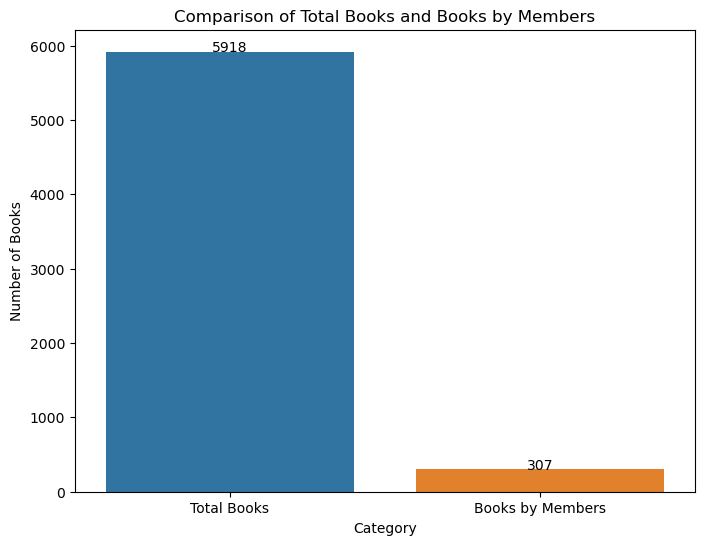

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the sco_books dataframe
sco_books = pd.read_csv('../data/SCoData_books_v1.2_2022_01.csv', encoding='utf-8', dtype={'year': 'Int32'})

# Assuming intersection_df is already loaded and contains the 'sco_author' column
# intersection_df = pd.read_csv('path_to_intersection_df.csv')  # Example of how you might load intersection_df

# Create a list of authors who are members
authors_is_member = intersection_df['sco_author'].tolist()

# Filter the sco_books dataframe to keep only the rows where the author is in the list of authors who are members
books_by_member = sco_books[sco_books['author'].isin(authors_is_member)]

# Remove duplicate titles
unique_books = sco_books[['title']].drop_duplicates()
unique_books_by_member = books_by_member[['title']].drop_duplicates()

# Calculate the number of unique titles
total_unique_titles = len(unique_books)
unique_titles_by_member = len(unique_books_by_member)

# Prepare data for plotting
data = pd.DataFrame({
    'Category': ['Total Books', 'Books by Members'],
    'Count': [total_unique_titles, unique_titles_by_member]
})

# Plot the diagram
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Category', y='Count', data=data)

# Add numbers on the bars
for index, row in data.iterrows():
    barplot.text(index, row.Count, round(row.Count, 2), color='black', ha="center")

plt.ylabel('Number of Books')
plt.title('Comparison of Total Books and Books by Members')
plt.show()